# Machine Learning Project - Spring 2023

## Introduction
This is an individual assignment and will be a chance for you to perform an applied data science project on a real data set. 

We will be working with the `telecom_df` data frame in this project. This data set contains information on over 1,000 customer of a U.S. telecommunications company. The description of this data and the variables contained in it are provided below.

The objective of this project is to explore the factors that lead to customers canceling their mobile and Internet service and develop machine learning algorithms that will predict the likelihood of a customer canceling their service in the future.

## Telecommunications Data

The `telecom_df` data frame contains information on the customers of a large U.S. telecommunications company which provides Internet and cellular service. 

The company is looking to see if it can determine the factors that lead to customers canceling their service and whether it can predict if a customer will cancel their service in the future. 

The company has experienced record levels of customers leaving their service in the past couple of years and this is leading to large financial losses. 

The goal is to become better at identifying customers at risk of canceling their service to minimize financial losses.

Specifically, the broad questions that the company is trying to answer include:

- What are the factors that are associated with customers canceling their service?
- Is it possible to predict whether a customer will cancel their service? If so, how accurate are the predictions?
- How many costly errors is the model expected to produce (customers classified as not canceling, but eventually do)?
- Are there any actions or policies the company can implement to reduce the risk of service cancellation?

The data set contains a mixture of customer information (senior citizen indicator, presence of dependents, months with the company, etc..), and customer behavior (type of Internet and cellular service, average monthly call minutes, etc...)

The outcome variable in this data is `canceled_service`. This variable records whether a customer eventually canceled their service and indicates a financial loss to the company.

**Note**: The outcome variable has been coded as a factor with 'yes' as the first level. This is the format that `tidymodels` expects for calculating model performance metrics. There is no need to recode this variable in your machine learning process.

### Data Definitions

| Variable            	| Definition                                 	| Data Type 	|
|:---------------------	|:--------------------------------------------	|:-----------	|
| canceled_service    	| Service cancellation (yes/no)             	| Factor    	|
| senior_citizen      	| Senior citizen (yes/no)                    	| Factor    	|
| spouse_partner      	| Spouse/Domestic partner (yes/no)           	| Factor    	|
| dependents          	| Household dependents (yes/no)              	| Factor    	|
| cellular_service    	| Type of ceullar service                    	| Factor    	|
| avg_call_mins       	| Average monthly call minutes               	| Numeric   	|
| avg_intl_mins       	| Average monthly international call minutes 	| Numeric   	|
| internet_service    	| Type of Internet service                   	| Factor    	|
| online_security     	| Online security (yes/no)                   	| Factor    	|
| online_backup       	| Online backup (yes/no)                     	| Factor    	|
| device_protection   	| Device protection (yes/no)                 	| Factor    	|
| tech_support        	| Tech support plan (yes/no)                 	| Factor    	|
| streaming_tv        	| Streaming TV (yes/no)                      	| Factor    	|
| streaming_movies    	| Streaming Movies (yes/no)                  	| Factor    	|
| contract            	| Contract Type                              	| Factor    	|
| paperless_bill      	| Paperless Billing (yes/no)                 	| Factor    	|
| payment_method      	| Payment Method                             	| Factor    	|
| months_with_company 	| Number of months with company              	| Numeric   	|
| monthly_charges     	| Monthly fees and charges                   	| Numeric   	|

In [13]:
# Load data
library(tidyverse)

telecom_df <- 
  readRDS(url('https://gmubusinessanalytics.netlify.app/data/telecom_df.rds'))

In [14]:
# View data
telecom_df

canceled_service,senior_citizen,spouse_partner,dependents,cellular_service,avg_call_mins,avg_intl_mins,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_bill,payment_method,months_with_company,monthly_charges
<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
no,no,no,no,single_line,307,105,digital,no,yes,yes,no,no,no,month_to_month,yes,credit_card,33,66.40
no,no,yes,yes,single_line,270,126,digital,yes,no,no,no,no,yes,one_year,no,mailed_check,9,48.60
no,no,yes,no,multiple_lines,349,130,fiber_optic,yes,yes,yes,no,no,yes,one_year,yes,electronic_check,71,109.60
yes,yes,yes,no,multiple_lines,357,59,fiber_optic,yes,yes,no,no,no,yes,month_to_month,yes,credit_card,7,94.70
no,no,no,yes,multiple_lines,370,181,fiber_optic,yes,no,yes,yes,no,no,two_year,yes,credit_card,66,90.95
no,yes,no,no,single_line,390,102,digital,no,yes,yes,no,no,no,month_to_month,yes,electronic_check,7,64.95
no,yes,yes,no,multiple_lines,369,89,fiber_optic,yes,yes,yes,no,yes,no,month_to_month,no,bank_draft,50,108.75
no,no,no,no,multiple_lines,325,142,fiber_optic,yes,yes,yes,yes,yes,no,month_to_month,yes,bank_draft,17,106.65
no,no,yes,yes,single_line,307,74,fiber_optic,no,no,no,yes,yes,yes,month_to_month,yes,electronic_check,9,75.85


# Exploratory Data Analysis (50 Points)

In this section, you must think of **at least 5 relevant questions** that explore the relationship between `canceled_service` and the other variables in the `telecom_df` data set. The goal of your analysis should be discovering which variables drive the differences between customers who do and do not cancel their service.

You must answer each question and provide supporting data summaries with either a summary data frame (using `dplyr`/`tidyr`) or a plot (using `ggplot`) or both.

In total, you must have a minimum of 3 plots (created with `ggplot`) and 3 summary data frames (created with `dplyr`) for the exploratory data analysis section. Among the plots you produce, you must have at least 3 different types (ex. box plot, bar chart, histogram, scatter plot, etc...)

Each question must be answered with **supporting evidence** from your tables and plots.

See the example question below.

### Sample Question
The sample below is from a previous semester where students analyzed a dataset, **employee_df**, with information on employees of a company and whether they decided to leave the company for another job.

The question, `R` code, and answer are examples of the correct style and language that you should use for your work.

### Question

*Is there a relationship between employees leaving the company and their current salary?*

**Answer**: Yes, the data indicates that employees who leave the company tend to have lower salaries when compared to employees who do not. Among the 237 employees that left the company, the average salary was \$76,625. This is over \$20,000 less than the average salary of employees who did not leave the company.

Among the employees *who did not leave the company*, only 10% have a salary that is less than or equal to \$60,000. When looking at employees who did leave the company, this increases to 34%.

### Supporting Table and Visualization

Note - the sample code and output below is an image, not code cells

<p align="center">
<img 
  src="./images/sample_table.jpg"
  width="650"
  height="auto"
/>
</p>

<br>

<p align="center">
<img 
  src="./images/sample_plot.jpg"
  width="650"
  height="auto"
/>
</p>


## Question 1


**Question**:
Is monthly charges effecting the telecom company sales? if yes, explain in brief.


**Answer**:

We can conclude from the visual representations below that there is a negligible impact of monthly fees on customers quitting the business. So, we cannot declare that monthly fees should be regarded as a significant element affecting the company's profits.



## Supporting Analysis

In [15]:
# This code adjusts the figure output size in the notebook
options(repr.plot.width=11, repr.plot.height=8)

Installing hrbrthemes [0.8.0] ...
	OK [linked cache]
Installing viridis [0.6.2] ...
	OK [linked cache]


`summarise()` has grouped output by 'canceled_service'. You can override using
the `.groups` argument.


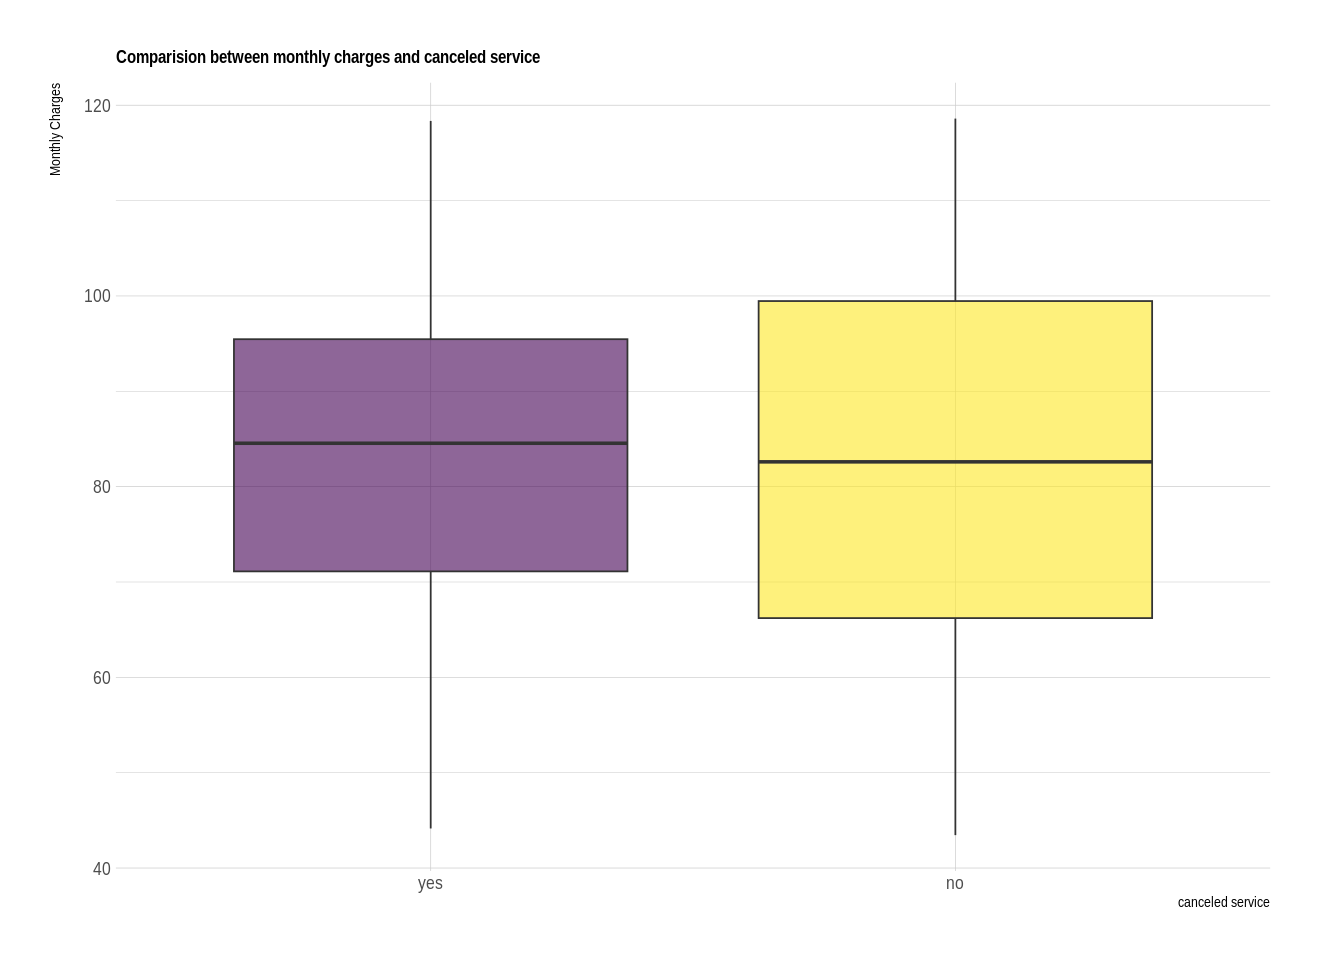

In [16]:
library(tidyverse)
install.packages("hrbrthemes")
library(hrbrthemes)
install.packages("viridis")
library(viridis)
telecom_df %>%
group_by(canceled_service,monthly_charges)%>%
summarise(mean_monthly_charges=mean(monthly_charges))%>%
  ggplot( aes(x=canceled_service, y=monthly_charges, fill=canceled_service)) +
  geom_boxplot() +
  scale_fill_viridis(discrete = TRUE, alpha=0.6) +
  theme_ipsum() +
  theme(
    legend.position="none",
    plot.title = element_text(size=11)
  ) +
  ggtitle("Comparision between monthly charges and canceled service") +
  xlab("canceled service")+
ylab("Monthly Charges
")

## Question 2

**Question**:
Is there any relation between contract and the canceled service? If yes, explain in brief.


**Answer**:

Yeah, it is evident from the visualisation below that those who signed a month-to-month contract are more likely to cancel the service than those who signed a two-year contract, who are more likely to keep the term without canceling. As we all know, in order to attract customers, businesses try to maintain high fees for those who signed a month-to-month contract while keeping fees low for those who signed a yearly contract. As a result, customers who signed a month-to-month contract are terminating the contract because of the high fees.


## Supporting Analysis


In [17]:
head(telecom_df)

canceled_service,senior_citizen,spouse_partner,dependents,cellular_service,avg_call_mins,avg_intl_mins,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_bill,payment_method,months_with_company,monthly_charges
<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
no,no,no,no,single_line,307,105,digital,no,yes,yes,no,no,no,month_to_month,yes,credit_card,33,66.40
no,no,yes,yes,single_line,270,126,digital,yes,no,no,no,no,yes,one_year,no,mailed_check,9,48.60
no,no,yes,no,multiple_lines,349,130,fiber_optic,yes,yes,yes,no,no,yes,one_year,yes,electronic_check,71,109.60
yes,yes,yes,no,multiple_lines,357,59,fiber_optic,yes,yes,no,no,no,yes,month_to_month,yes,credit_card,7,94.70
no,no,no,yes,multiple_lines,370,181,fiber_optic,yes,no,yes,yes,no,no,two_year,yes,credit_card,66,90.95
no,yes,no,no,single_line,390,102,digital,no,yes,yes,no,no,no,month_to_month,yes,electronic_check,7,64.95


`summarise()` has grouped output by 'canceled_service'. You can override using
the `.groups` argument.


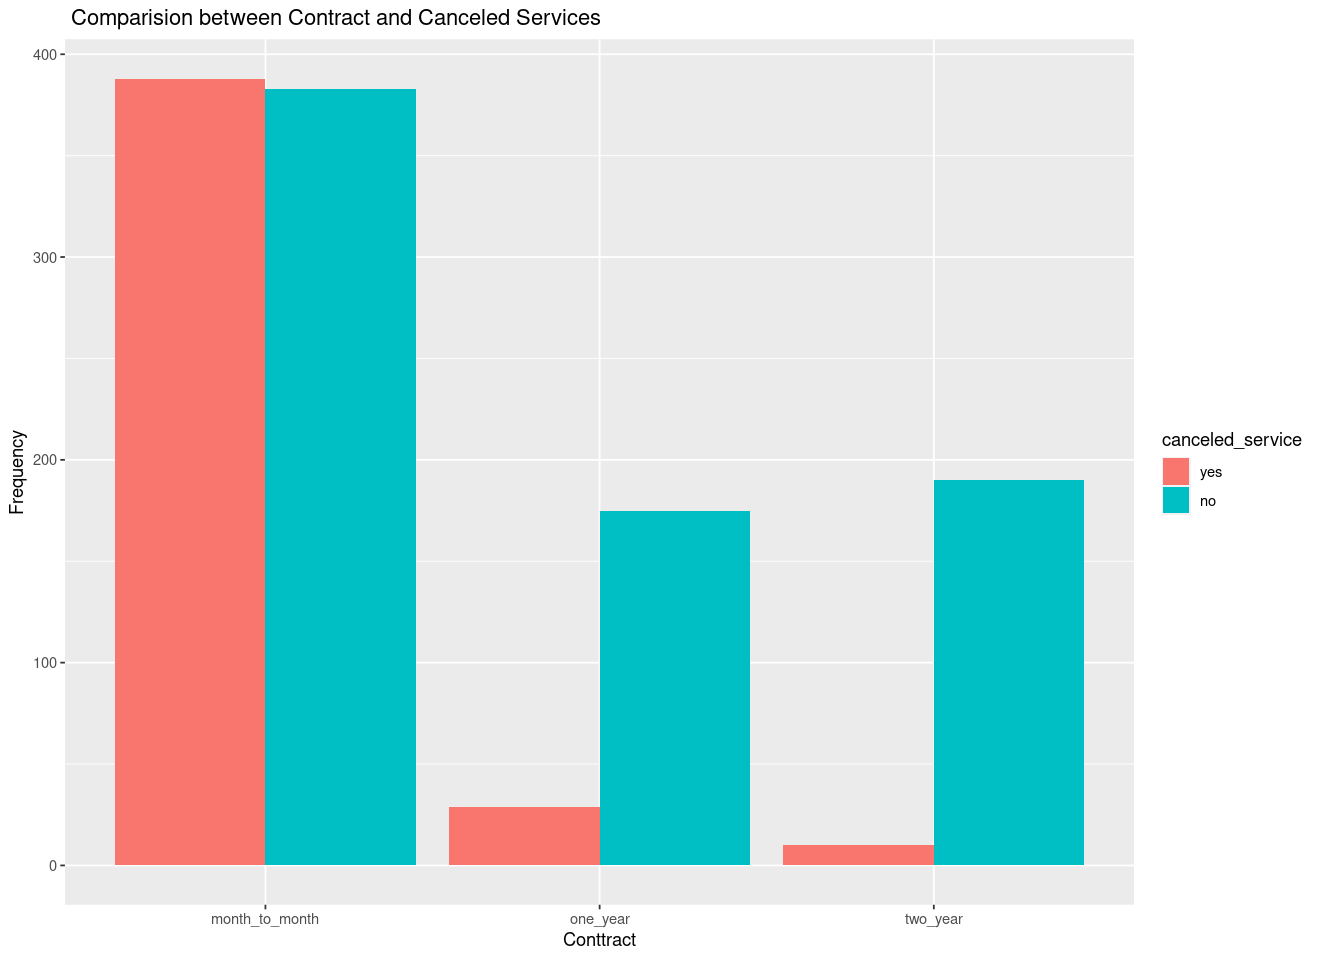

In [18]:
telecom_df%>%
group_by(canceled_service,contract)%>%
summarise(n=n())%>%

ggplot(aes(x = contract, y = n))+
  geom_bar(
    aes(fill = canceled_service), stat = "identity",
    position = position_dodge(0.9)
    )+
labs(title  = " Comparision between Contract and Canceled Services",
	 x='Conttract',
	 y='Frequency',
       fill = "canceled_service")

## Question 3


**Question**:

Is there any relation between network and canceled Service? If yes, explain in breif.


**Answer**:

Yes, from the below visualisation we can clearly understand that, the customers who took fibre optics network are most likely to cancel the service and the customers who took digital network are most likely to continue with the service.



`summarise()` has grouped output by 'canceled_service'. You can override using
the `.groups` argument.


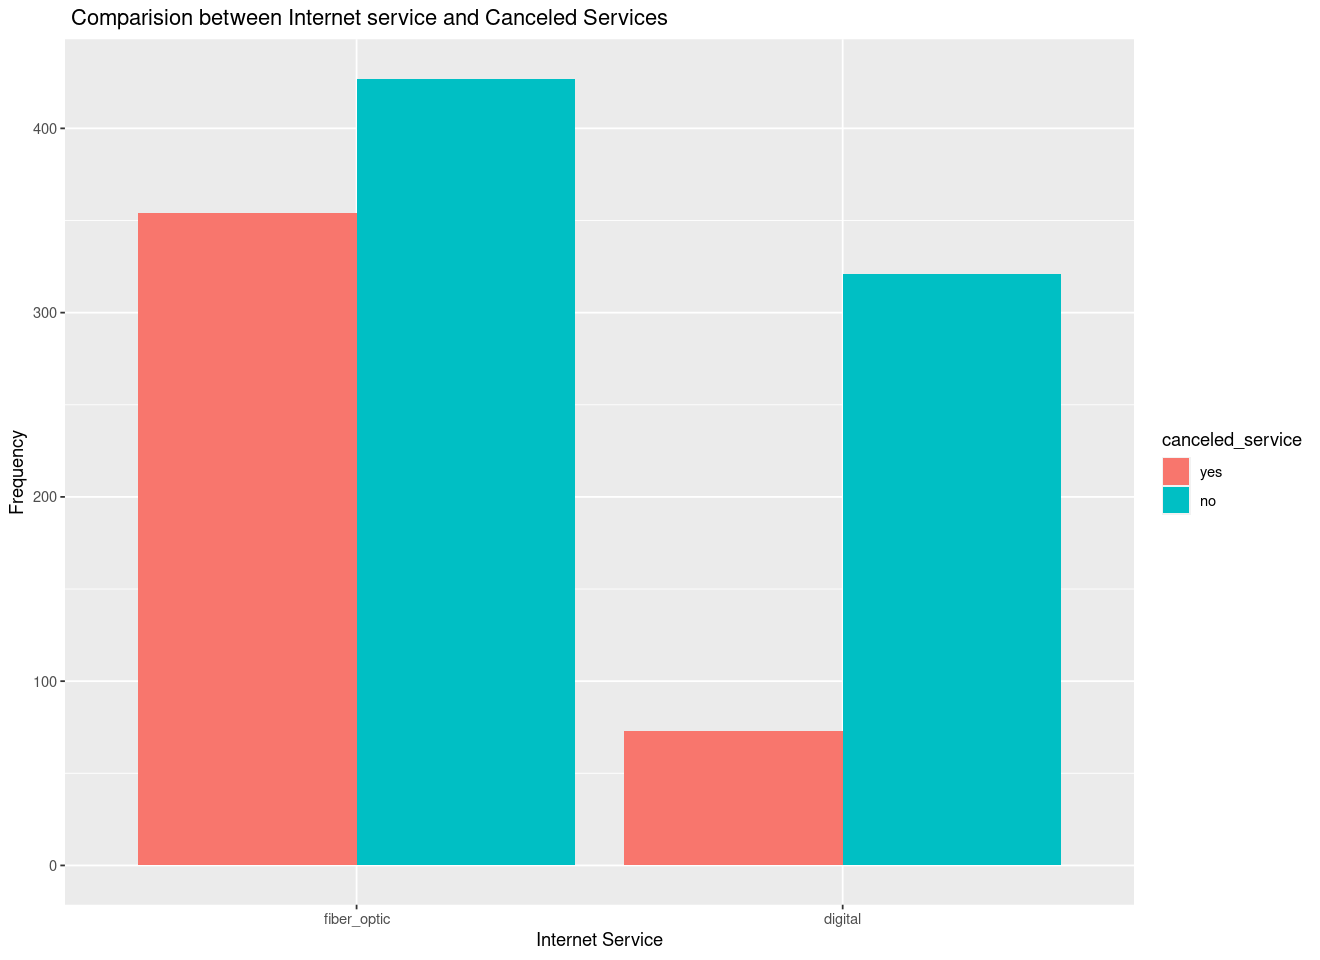

In [19]:
telecom_df%>%
group_by(canceled_service,internet_service)%>%
summarise(n=n())%>%
ggplot(aes(x = internet_service, y = n))+
  geom_bar(
    aes(fill = canceled_service), stat = "identity",
    position = position_dodge(0.9)
    )+
labs(title  = " Comparision between Internet service and Canceled Services",
	 x='Internet Service',
	 y='Frequency',
       fill = "canceled_service")

## Supporting Analysis


## Question 4


**Question**:
Is there any relation between cellular service and canceled Services? Explain with visualisation.


**Answer**:
Certainly, it is evident from the visualisation below that consumers who have purchased numerous lines are more likely to cancel the service than those who have just purchased a single line. The expense of having numerous lines may be more than the cost of having a single line, which is why customers who have many lines are abandoning their subscription. This is visualized in the image below.


## Supporting Analysis


`summarise()` has grouped output by 'canceled_service'. You can override using
the `.groups` argument.


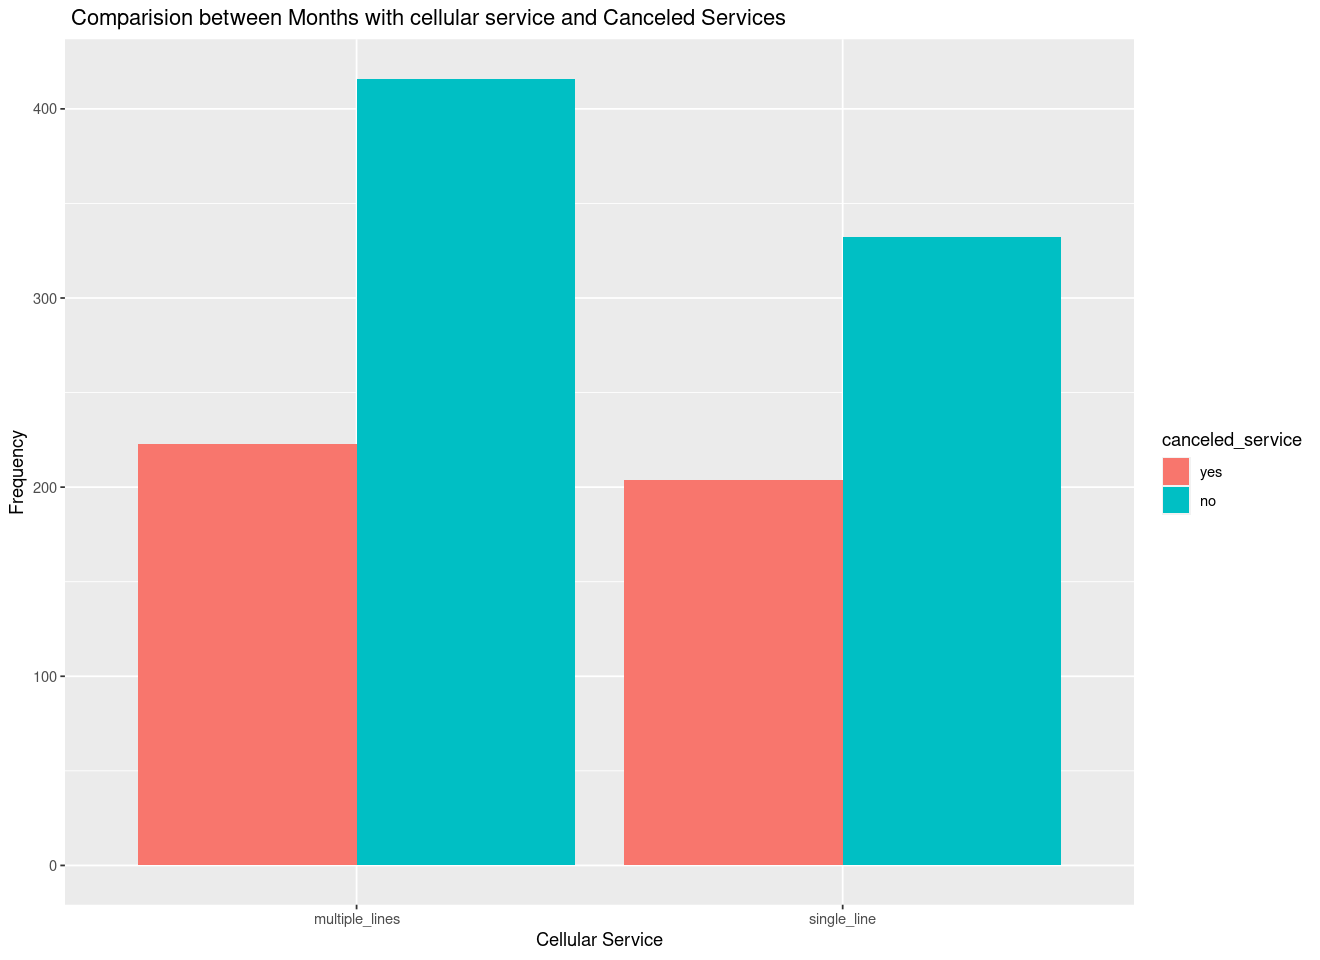

In [20]:
telecom_df%>%
group_by(canceled_service,cellular_service)%>%
summarise(n=n())%>%
ggplot(aes(x = cellular_service, y = n))+
  geom_bar(
    aes(fill = canceled_service), stat = "identity",
    position = position_dodge(0.9)
    ) +
labs(title  = " Comparision between Months with cellular service and Canceled Services",
	 x='Cellular Service',
	 y='Frequency',
       fill = "canceled_service")

## Question 5


**Question**:
Explain the relation between months with the company and canceled services?


**Answer**:

The below graph makes it very evident that customers are more likely to discontinue service at the beginning of the month than they are to continue it as the number of months spent with the business grows. The cause of this may be because customers first had challenges with the company, which the business may have taken some time to resolve technically, leading to customers continuing to use the service as the number of months with the business increased.





## Supporting Analysis


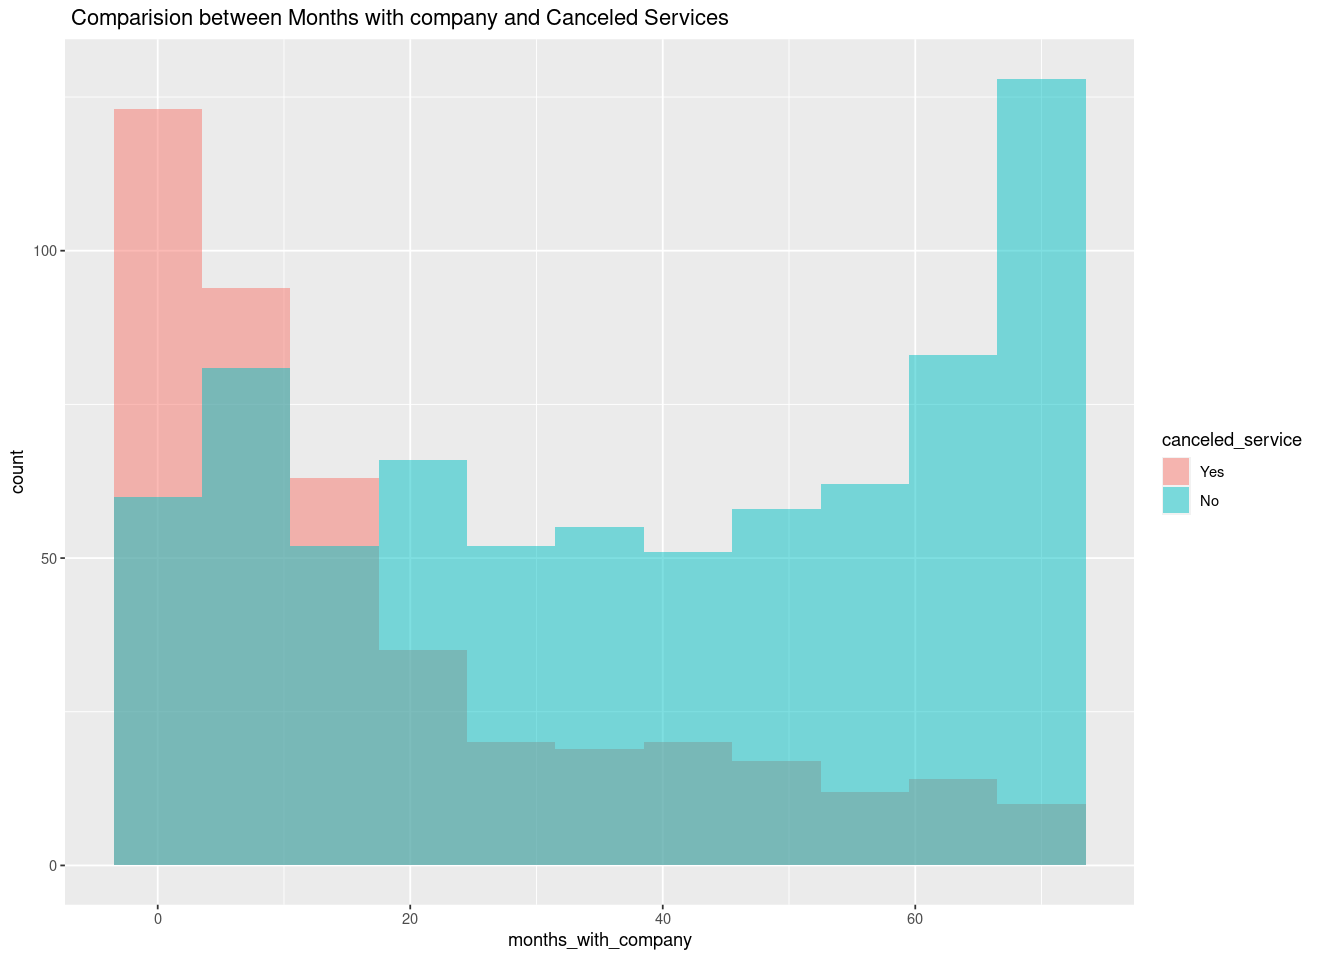

In [21]:
ggplot(telecom_df, aes(x=months_with_company,fill=factor(canceled_service))) + 
  geom_histogram(binwidth=7, alpha=0.5, position = 'identity') +
  labs(title  = " Comparision between Months with company and Canceled Services",
       fill = "canceled_service")+
  scale_fill_discrete(labels = c("Yes", "No"))

# Machine Learning Modeling (75 Points)
In this section of the project, you will fit **three classification algorithms** to predict the response variable,`canceled_service`. You should use all of the other variables in the `telecom_df` data as predictor variables for each model.

You must follow the machine learning steps below. 

The data splitting and feature engineering steps should only be done once so that your models are using the same data and feature engineering steps for training.

1. Split the `telecom_df` data into a training and test set (remember to set your seed)
2. Specify a feature engineering pipeline with the `recipes` package
    - You can include steps such as skewness transformation, dummy variable encoding or any other steps you find appropriate
3. Specify a `parsnip` model object
    - You may choose from the following classification algorithms:
      - Logistic Regression
      - LDA
      - QDA
      - KNN
      - Decision Tree
      - Random Forest
4. Package your recipe and model into a workflow
5. Fit your workflow to the training data
    - If your model has hyperparameters:
      - Split the training data into 5 folds for 5-fold cross validation using `vfold_cv` (remember to set your seed)
      - Perform hyperparamter tuning with a random grid search using the `grid_random()` function
      - Refer to the following tutorial for an example - [Random Grid Search](https://gmubusinessanalytics.netlify.app/lesson-08-r-tutorial.html#Hyperparameter_Tuning14)
      - Hyperparameter tuning can take a significant amount of computing time. Be careful not to set the `size` argument of `grid_random()` too large. I recommend `size` = 10 or smaller.
      - Select the best model with `select_best()` and finalize your workflow
6. Evaluate model performance on the test set by plotting an ROC curve using `autoplot()` and calculating the area under the ROC curve on your test data

In [22]:
# Run this R code to install ML packages that you might need (Will take about 2 minutes)
install.packages(
    c('vip', 'rpart.plot', 'discrim', 'klaR', 'ranger'), 
    repos = 'https://mran.microsoft.com/snapshot/2023-01-01/')

Installing packages into ‘/home/repl/renv/library/R-4.2/x86_64-pc-linux-gnu’
(as ‘lib’ is unspecified)



## Data Resampling
First split your data into training and test sets. If performing hyperparameter tuning, also create folds from your training data

In [23]:
library(tidymodels) 
telecom_split <- initial_split(telecom_df,strata= canceled_service)

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.3     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.1.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.5     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Search for functions across packages at https://www.tidymodels.org/find/



In [24]:
telecom_training <- telecom_split %>%
					training()

In [25]:
telecom_testing <- telecom_split %>%
					testing()

## Feature Engineering Pipeline
Specify your feature engineering pipeline with the `recipes` package. You will use the pipeline when you create your modeling workflows below for each of your models.

In [26]:
telecom_recipe<- recipe(canceled_service~.,data=telecom_training)%>%
				step_corr(all_numeric(), threshold = 0.9)%>%
				step_normalize(all_numeric())%>%
				step_dummy(all_nominal(),-all_outcomes())

In [27]:
telecom_recipe_prep <- telecom_recipe%>%
						prep(training=telecom_training)

In [28]:
telecom_test_prep<-telecom_recipe_prep%>%
					bake(new_data=telecom_testing)

## Model 1 Training

In [29]:
library(tidymodels) 
logistic_model <- logistic_reg()%>%
					set_engine("glm")%>%
					set_mode('classification')

In [30]:
logistic_fit<- logistic_model %>%
				fit(canceled_service~.,data=telecom_training)
logistic_fit

parsnip model object


Call:  stats::glm(formula = canceled_service ~ ., family = stats::binomial, 
    data = data)

Coefficients:
                   (Intercept)                senior_citizenno  
                      0.043288                        0.481048  
              spouse_partnerno                    dependentsno  
                     -0.174833                        0.201590  
   cellular_servicesingle_line                   avg_call_mins  
                      0.318344                       -0.009881  
                 avg_intl_mins         internet_servicedigital  
                      0.025331                        0.998384  
             online_securityno                 online_backupno  
                     -0.569168                       -0.256581  
           device_protectionno                  tech_supportno  
                      0.003089                       -0.334276  
                streaming_tvno              streaming_moviesno  
                      0

In [31]:
class_preds<- logistic_fit%>%
				predict(new_data=telecom_testing,
                       type='class')

In [32]:
class_preds

.pred_class
<fct>
yes
no
no
yes
no
yes
yes
no
no


In [33]:
prob_preds<- logistic_fit%>%
				predict(new_data= telecom_testing,
                       	type='prob')
prob_preds

.pred_yes,.pred_no
<dbl>,<dbl>
0.645660031,0.35433997
0.097953721,0.90204628
0.278340563,0.72165944
0.791620231,0.20837977
0.109452122,0.89054788
0.621891612,0.37810839
0.514261999,0.48573800
0.239352159,0.76064784
0.355765167,0.64423483


In [34]:
library(tidyverse)
telecom_results<- telecom_testing %>%
					select(canceled_service) %>%
					bind_cols(class_preds,prob_preds)
telecom_results


canceled_service,.pred_class,.pred_yes,.pred_no
<fct>,<fct>,<dbl>,<dbl>
yes,yes,0.645660031,0.35433997
no,no,0.097953721,0.90204628
no,no,0.278340563,0.72165944
yes,yes,0.791620231,0.20837977
no,no,0.109452122,0.89054788
no,yes,0.621891612,0.37810839
yes,yes,0.514261999,0.48573800
yes,no,0.239352159,0.76064784
no,no,0.355765167,0.64423483


## Model 1 Performance Evaluation

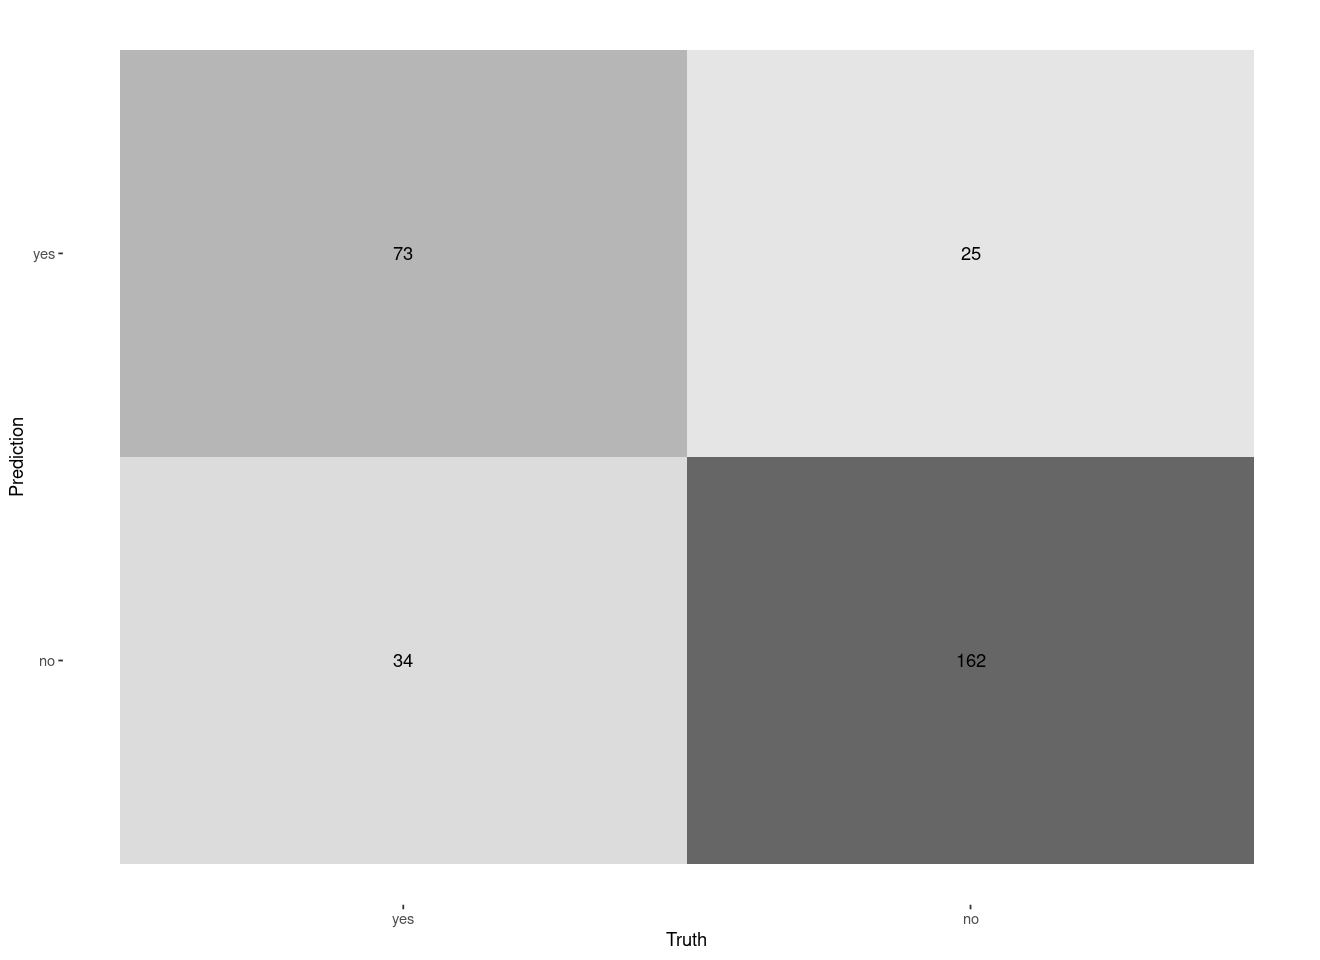

In [35]:
#Confusion Matrix
conf_mat(telecom_results,
        	truth=canceled_service,
        estimate=.pred_class )%>%
autoplot(type= 'heatmap')

In [36]:
#Classification Accuracy

In [37]:
accuracy(telecom_results,
        	truth=canceled_service,
        	estimate=.pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7993197


In [38]:
spec(telecom_results, 
    truth = canceled_service,
    estimate= .pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
spec,binary,0.8663102


In [39]:
#Sensivity
sens(telecom_results,
    	truth=canceled_service,
    	estimate=.pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
sens,binary,0.682243


In [40]:
#Metric Set
custom_metrics <-metric_set(accuracy,sens,spec)
custom_metrics(telecom_results,truth=canceled_service,estimate=.pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7993197
sens,binary,0.6822430
spec,binary,0.8663102


Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.
ℹ The deprecated feature was likely used in the yardstick package.
  Please report the issue at <https://github.com/tidymodels/yardstick/issues>.”


.threshold,specificity,sensitivity
<dbl>,<dbl>,<dbl>
-Inf,0.000000000,1
0.001540836,0.000000000,1
0.002151037,0.005347594,1
0.002578421,0.010695187,1
0.003069731,0.016042781,1
0.003195485,0.021390374,1
0.003252986,0.026737968,1
0.004141695,0.032085561,1
0.004237446,0.037433155,1


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
roc_auc,binary,0.8762057


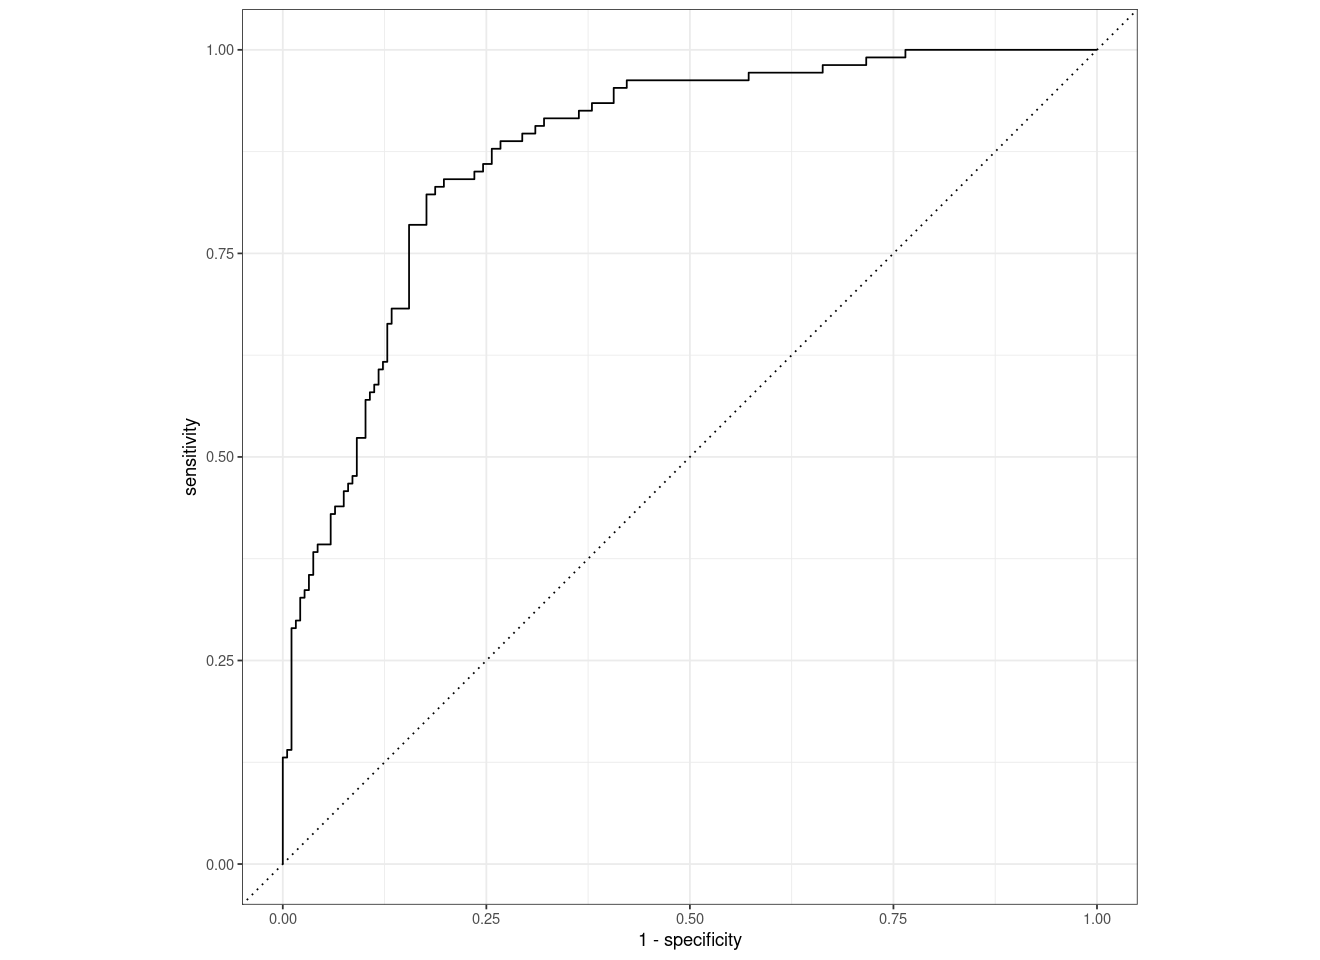

In [41]:
threshold_df <- telecom_results %>% 
  roc_curve(truth = canceled_service, .pred_yes)

# View results
threshold_df

# Plot ROC curve
threshold_df %>% 
  autoplot()

# Calculate ROC AUC
roc_auc(telecom_results,
        truth = canceled_service, 
        .pred_yes)

## Model 2 Training

In [42]:
set.seed(314)

telecom_folds <- vfold_cv(telecom_training, v = 5)

In [43]:
telecom_recipe %>% 
  prep(training = telecom_training) %>% 
  bake(new_data = NULL)

avg_call_mins,avg_intl_mins,months_with_company,monthly_charges,canceled_service,senior_citizen_no,spouse_partner_no,dependents_no,cellular_service_single_line,internet_service_digital,⋯,device_protection_no,tech_support_no,streaming_tv_no,streaming_movies_no,contract_one_year,contract_two_year,paperless_bill_no,payment_method_credit_card,payment_method_electronic_check,payment_method_mailed_check
<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.60692474,-0.04199101,0.05894976,-0.8759931,no,1,1,1,1,1,⋯,0,1,1,1,0,0,0,1,0,0
-1.11096096,0.62830717,-0.92559501,-1.8479428,no,1,0,0,1,1,⋯,1,1,1,0,1,0,1,0,0,1
-0.03477551,0.75598302,1.61781231,1.4828961,no,1,0,1,0,0,⋯,0,1,1,0,1,0,0,0,1,0
0.25129910,2.38385002,1.41269882,0.4645331,no,1,1,0,0,0,⋯,0,0,1,1,0,1,0,1,0,0
0.52375111,-0.13774789,-1.00764041,-0.9551688,no,0,1,1,1,1,⋯,0,1,1,1,0,0,0,0,1,0
0.23767650,-0.55269438,0.75633564,1.4364828,no,0,0,1,0,0,⋯,0,1,0,1,0,0,1,0,0,0
-0.36171793,1.13901055,-0.59741342,1.3218146,no,1,1,1,0,0,⋯,0,0,0,1,0,0,0,0,0,0
-0.60692474,-1.03147879,-0.92559501,-0.3599861,no,1,0,0,1,0,⋯,1,0,0,0,0,0,0,0,1,0
-0.59330214,1.42628120,1.37167612,1.3654977,no,0,0,0,0,0,⋯,0,1,0,1,1,0,0,0,1,0


In [44]:
#Model Specification
tree_mod <- decision_tree(cost_complexity = tune(),
                            tree_depth = tune(),
                            min_n = tune()) %>% 
              set_engine('rpart') %>% 
              set_mode('classification')

In [45]:
#Workflow
tree_wf <- workflow() %>% 
                 add_model(tree_mod) %>% 
                 add_recipe(telecom_recipe)

In [46]:
tree_g <- grid_regular(cost_complexity(),
                          tree_depth(),
                          min_n(), 
                          levels = 2)
tree_g

cost_complexity,tree_depth,min_n
<dbl>,<int>,<int>
1e-10,1,2
1e-01,1,2
1e-10,15,2
1e-01,15,2
1e-10,1,40
1e-01,1,40
1e-10,15,40
1e-01,15,40


In [47]:
#Tuning Hyperparameter with tune grid()
set.seed(282828)

tree_t <- tree_wf %>% 
               tune_grid(resamples = telecom_folds,
                         grid = tree_g)

In [48]:
tree_t %>% show_best('roc_auc')

cost_complexity,tree_depth,min_n,.metric,.estimator,mean,n,std_err,.config
<dbl>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1e-10,15,40,roc_auc,binary,0.8274194,5,0.01425000,Preprocessor1_Model7
1e-01,15,2,roc_auc,binary,0.7120796,5,0.02133771,Preprocessor1_Model4
1e-01,15,40,roc_auc,binary,0.7120796,5,0.02133771,Preprocessor1_Model8
1e-10,15,2,roc_auc,binary,0.7044020,5,0.00527202,Preprocessor1_Model3
1e-10,1,2,roc_auc,binary,0.7002214,5,0.01516364,Preprocessor1_Model1


In [49]:
best_tree <- tree_t %>% 
             select_best(metric = 'roc_auc')

# View the best tree parameters
best_tree

cost_complexity,tree_depth,min_n,.config
<dbl>,<int>,<int>,<chr>
1e-10,15,40,Preprocessor1_Model7


In [50]:
#Finalise workflow.
final_tree_wf <- tree_wf %>% 
                       finalize_workflow(best_tree)

In [51]:
tree_wf_fit <- final_tree_wf%>% 
               fit(data = telecom_training)

In [52]:
tree_fit <- tree_wf_fit %>% 
            extract_fit_parsnip()


Attaching package: ‘vip’


The following object is masked from ‘package:utils’:

    vi




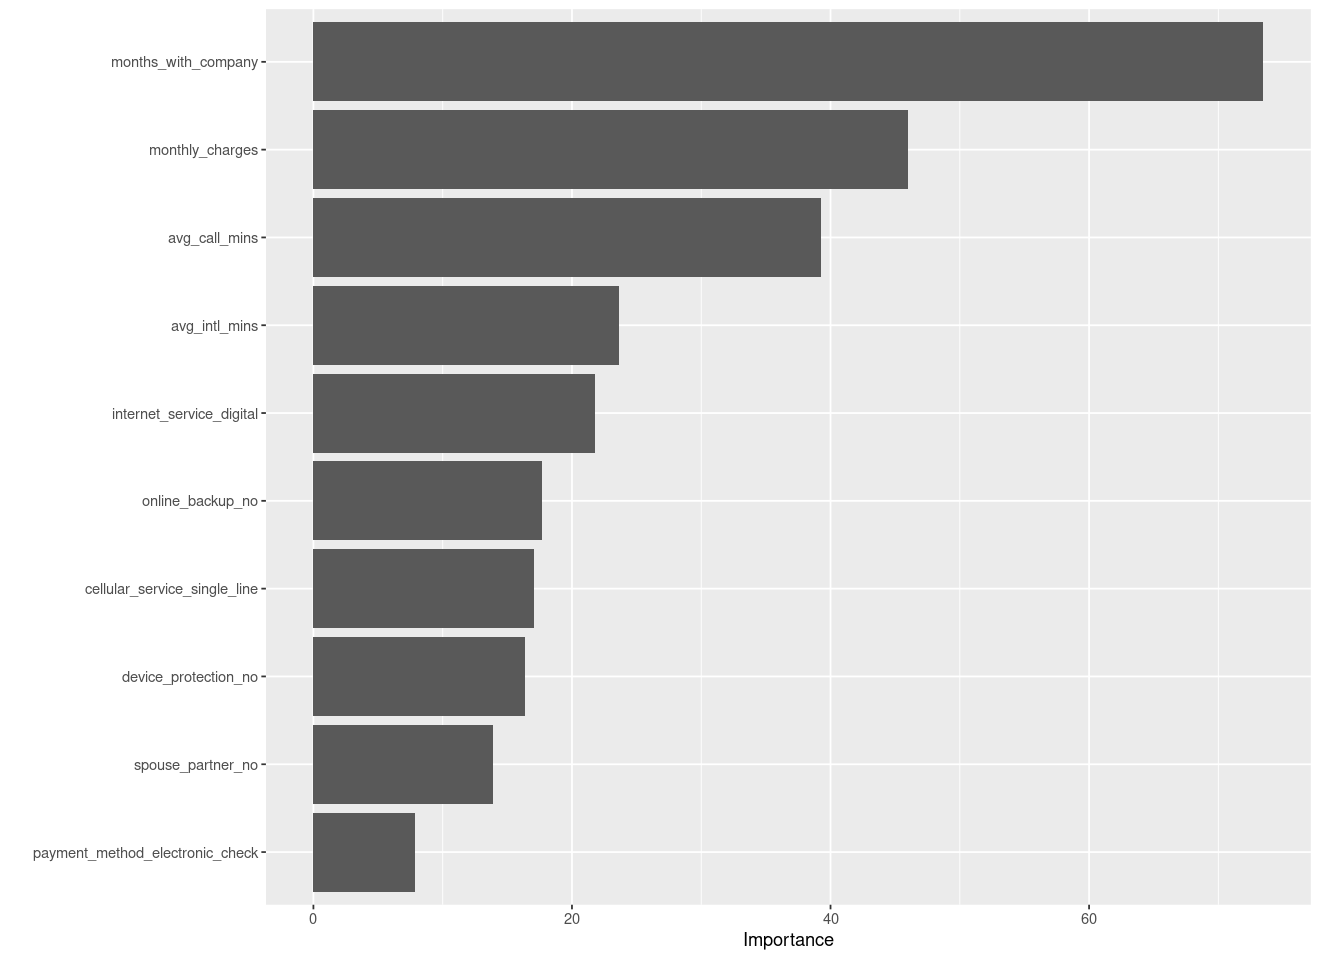

In [53]:
library(vip)
vip(tree_fit)

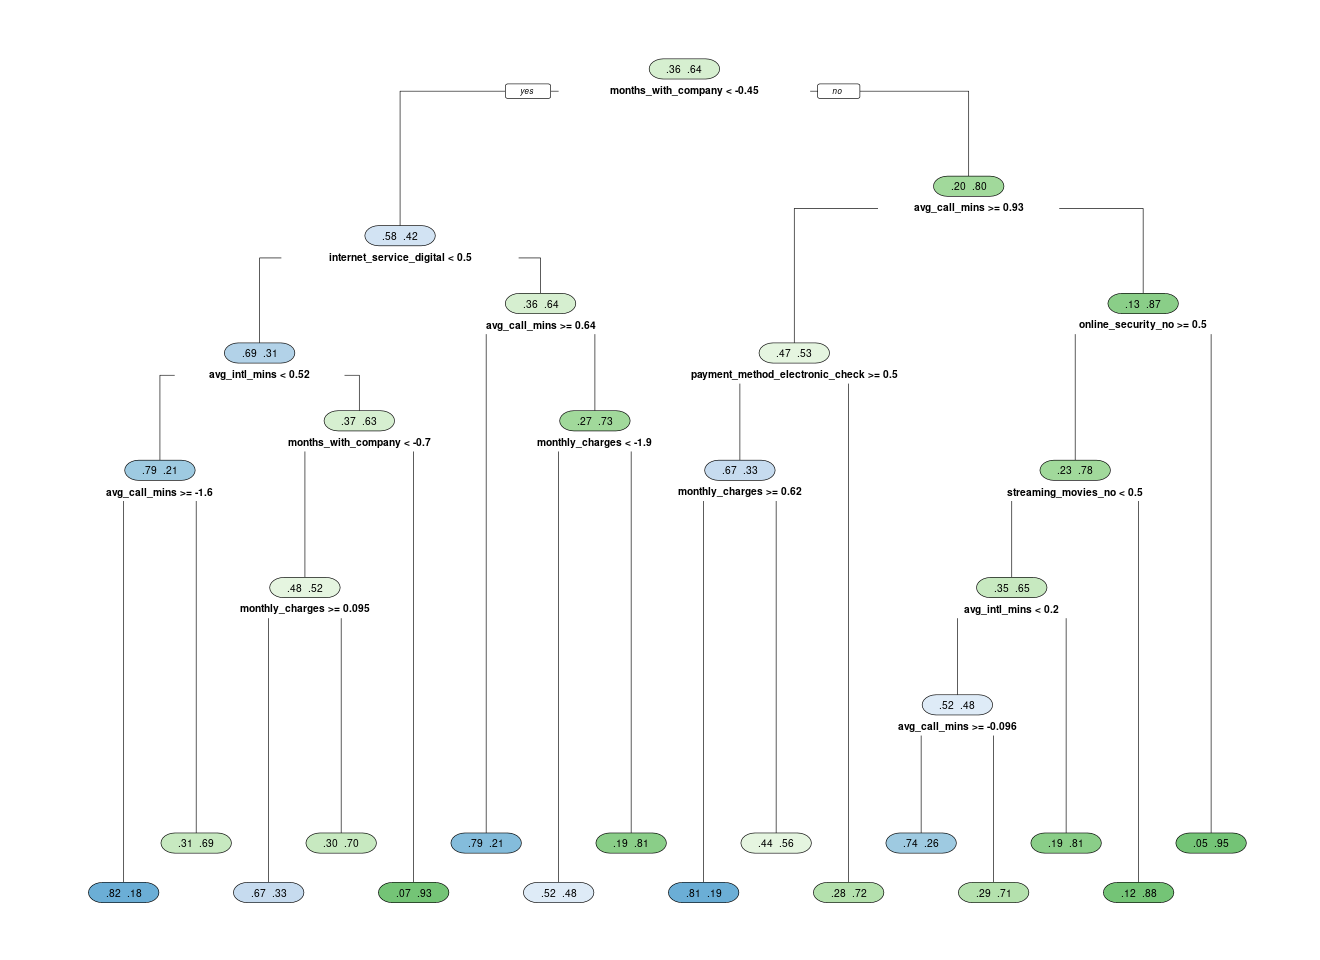

In [54]:
library(rpart.plot)
rpart.plot(tree_fit$fit, roundint = FALSE, extra = 5)

## Model 2 Performance Evaluation

In [55]:
tree_last_fit <- final_tree_wf %>% 
                 last_fit(telecom_split)

In [56]:
tree_last_fit %>% collect_metrics()

.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
accuracy,binary,0.7380952,Preprocessor1_Model1
roc_auc,binary,0.7939927,Preprocessor1_Model1


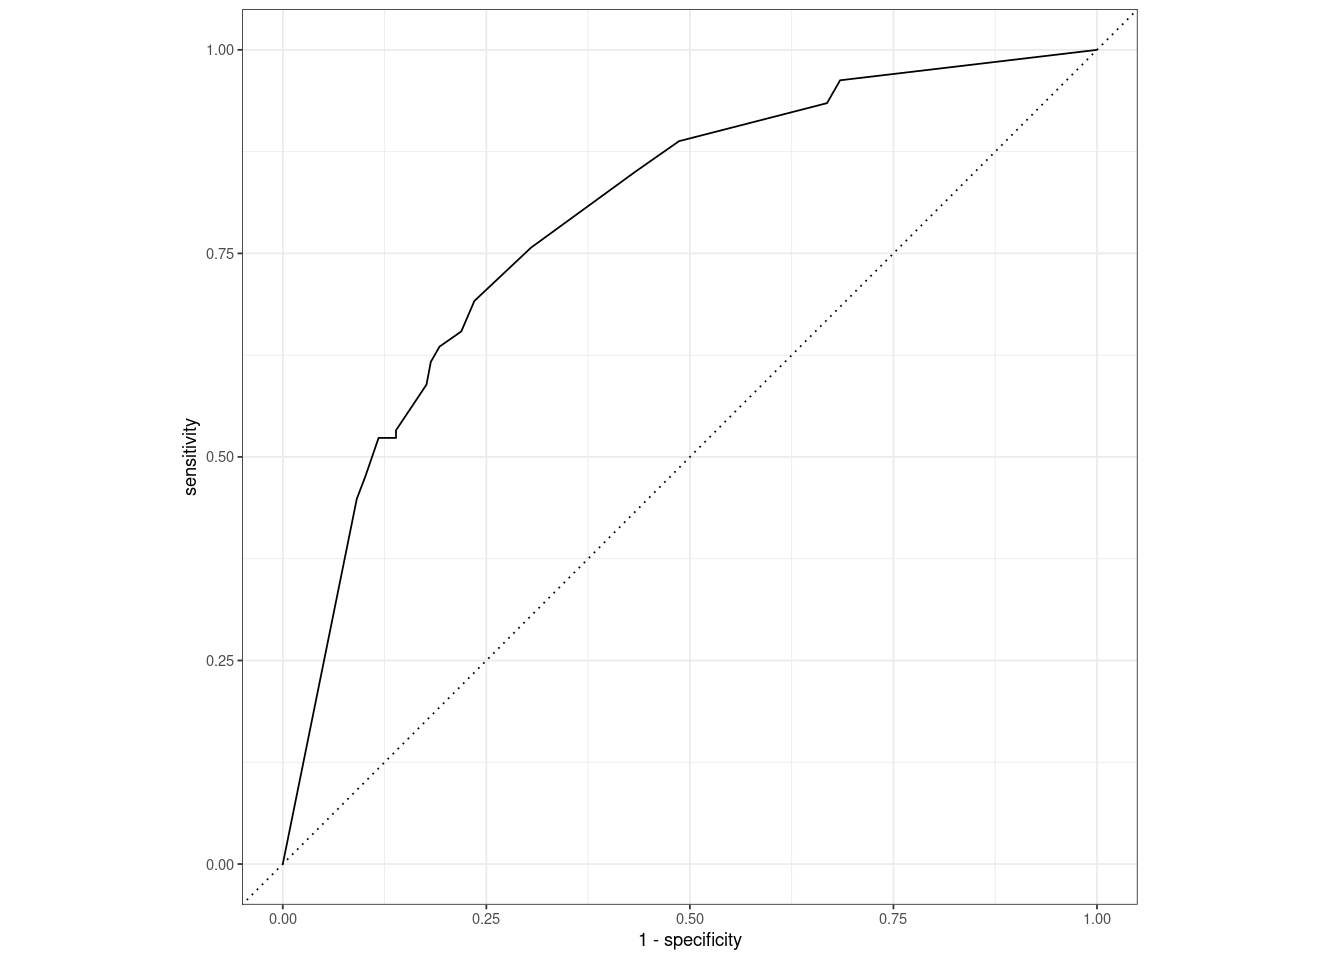

In [57]:
tree_last_fit %>% collect_predictions() %>% 
                  roc_curve(truth  = canceled_service, estimate = .pred_yes) %>% 
                  autoplot()

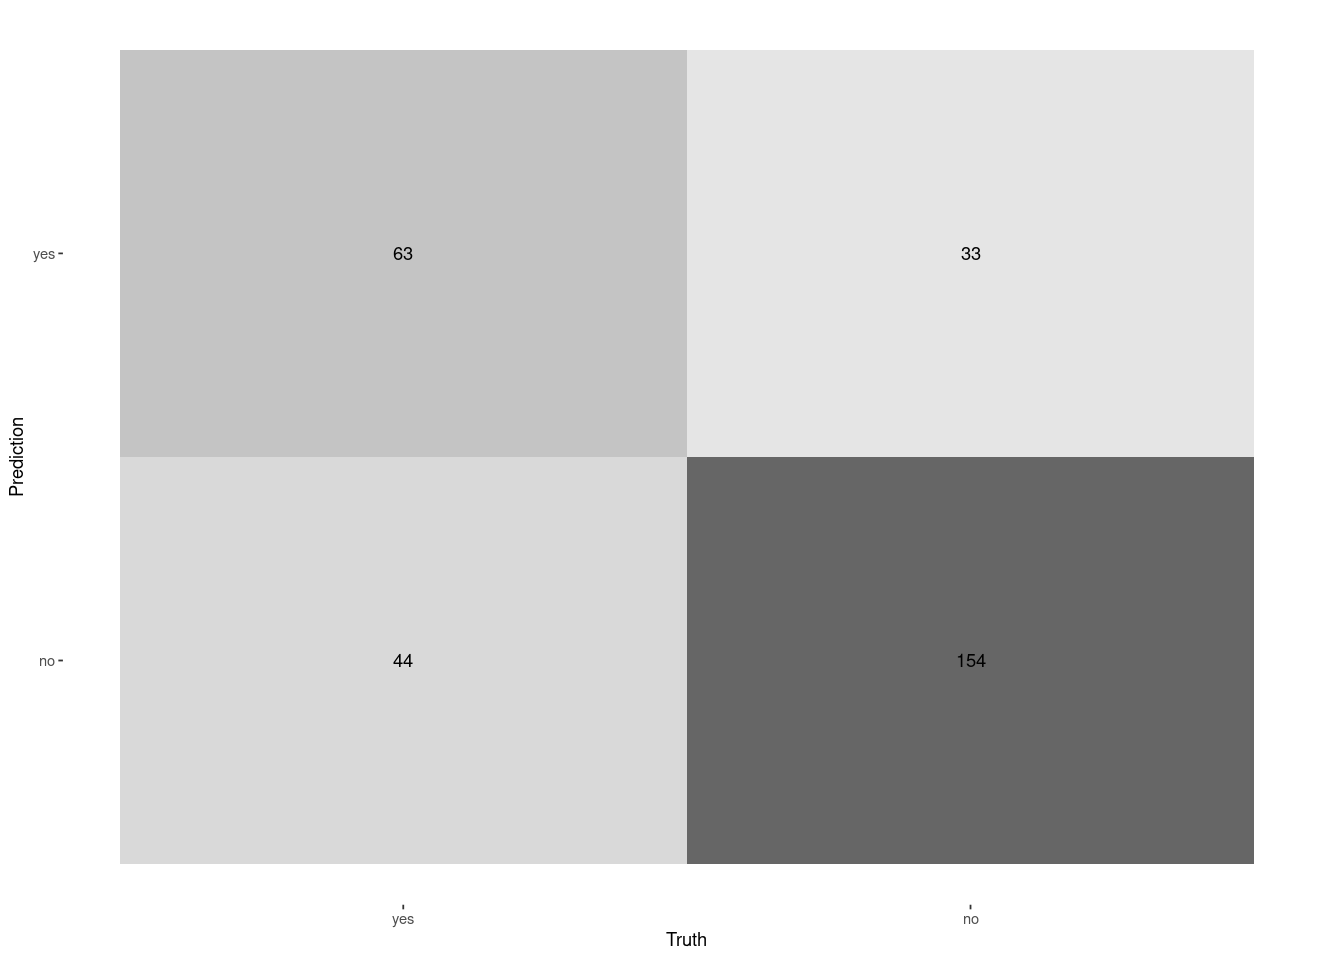

In [58]:
tree_predictions <- tree_last_fit %>% collect_predictions()

conf_mat(tree_predictions, truth = canceled_service, estimate = .pred_class)%>%
autoplot(type= 'heatmap')



## Model 3 Training

In [59]:
random_forest <- rand_forest(mtry = tune(),
                        trees = tune(),
                        min_n = tune()) %>% 
            set_engine('ranger', importance = "impurity") %>% 
            set_mode('classification')

In [60]:
rf_wf <- workflow() %>% 
               add_model(random_forest) %>% 
               add_recipe(telecom_recipe)

In [61]:
set.seed(7845873)

rf_g <- grid_random(mtry() %>% range_set(c(2, 4)),
                       trees(),
                       min_n(),
                       size = 10)
rf_g

mtry,trees,min_n
<int>,<int>,<int>
2,1709,29
2,1985,21
4,1656,9
3,1564,25
4,1243,20
2,64,32
4,1755,9
3,485,34
4,715,21


In [62]:
set.seed(314)

rf_t <- rf_wf %>% 
             tune_grid(resamples = telecom_folds,
                       grid = rf_g)

In [63]:
rf_t %>% show_best('roc_auc')

mtry,trees,min_n,.metric,.estimator,mean,n,std_err,.config
<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
4,1043,23,roc_auc,binary,0.8751993,5,0.007968073,Preprocessor1_Model10
4,715,21,roc_auc,binary,0.8741850,5,0.009650294,Preprocessor1_Model09
3,1564,25,roc_auc,binary,0.8739173,5,0.009010351,Preprocessor1_Model04
3,485,34,roc_auc,binary,0.8739044,5,0.009065334,Preprocessor1_Model08
4,1755,9,roc_auc,binary,0.8736847,5,0.008157968,Preprocessor1_Model07


In [64]:
best_rf <- rf_t %>% 
           select_best(metric = 'roc_auc')

# View the best parameters
best_rf

mtry,trees,min_n,.config
<int>,<int>,<int>,<chr>
4,1043,23,Preprocessor1_Model10


In [65]:
final_rf_wf <- rf_wf %>% 
                     finalize_workflow(best_rf)

In [66]:
rf_wf_fit <- final_rf_wf %>% 
             fit(data = telecom_training)

In [67]:
rf_fit <- rf_wf_fit %>% 
          extract_fit_parsnip()

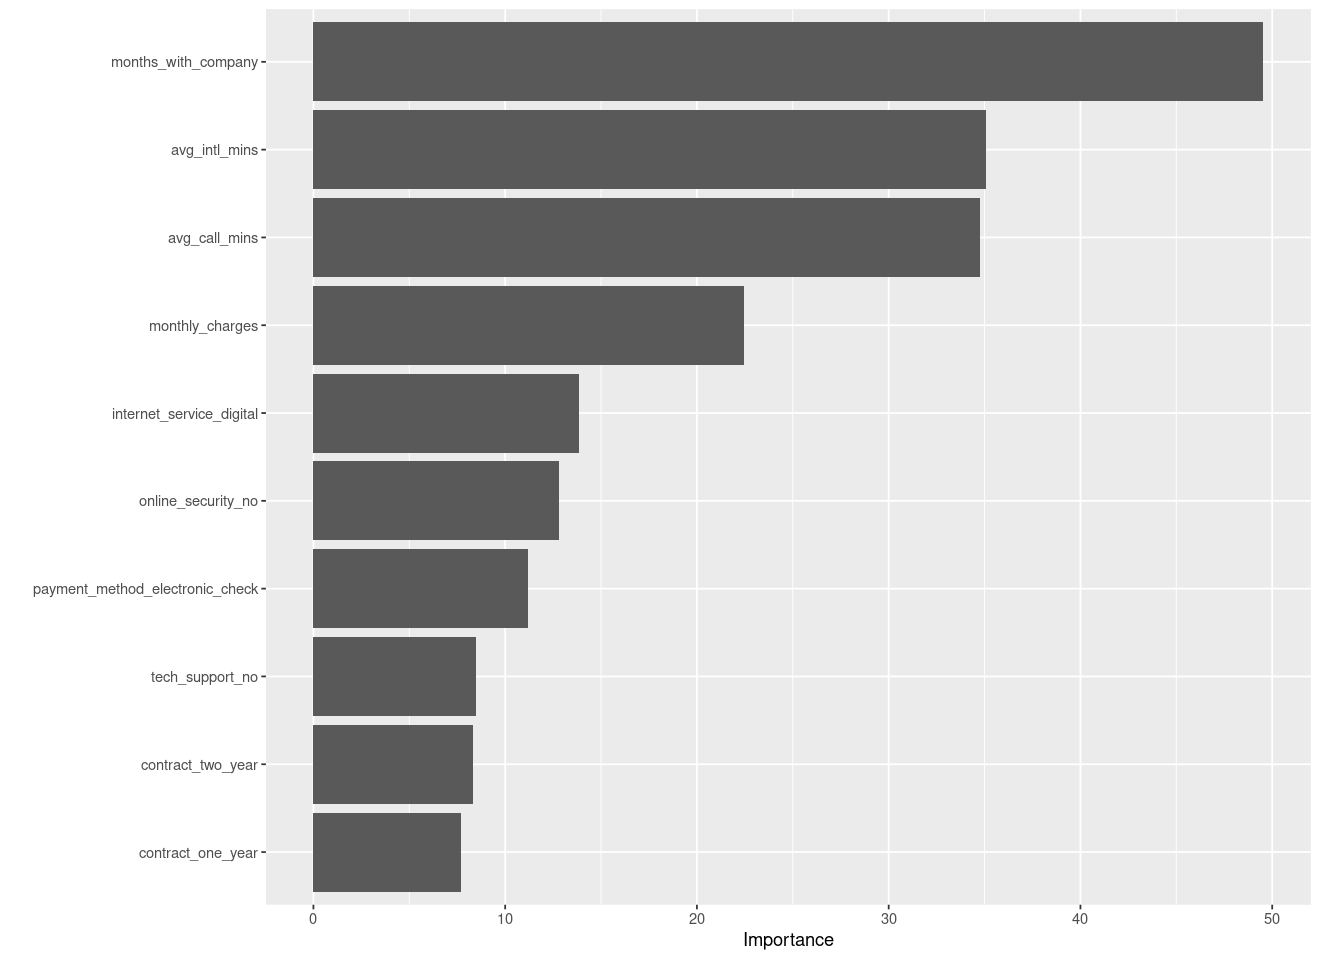

In [68]:
vip(rf_fit)


## Model 3 Performance Evaluation

In [70]:
rf_last_fit <- final_rf_wf %>% 
               last_fit(telecom_split)

In [71]:
rf_last_fit %>% collect_metrics()

.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
accuracy,binary,0.7823129,Preprocessor1_Model1
roc_auc,binary,0.8622120,Preprocessor1_Model1


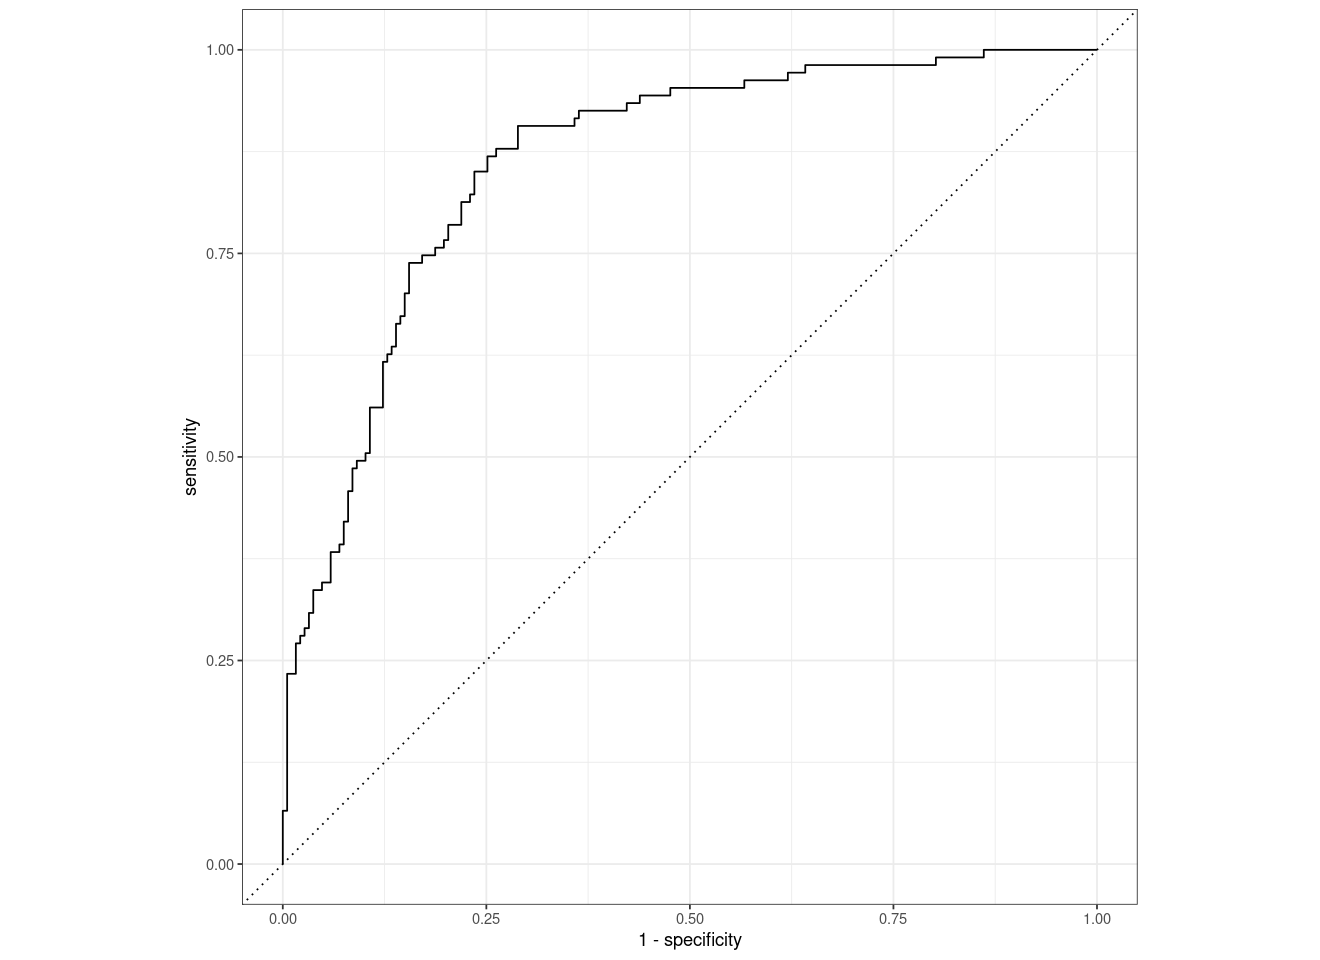

In [72]:
rf_last_fit %>% collect_predictions() %>% 
                roc_curve(truth  = canceled_service, estimate = .pred_yes) %>% 
                autoplot()

In [73]:
rf_predictions <- rf_last_fit %>% collect_predictions()

conf_mat(rf_predictions, truth = canceled_service, estimate = .pred_class)

          Truth
Prediction yes  no
       yes  69  26
       no   38 161

# Executive Summary (25 Points)

Write an executive summary of your overall findings and recommendations to the executives at this company. Think of this section as your closing remarks of a presentation, where you summarize your key findings and make recommendations to improve pricing, company operations, and car insurance policy adjustments.

Your executive summary must be written in a [professional tone](https://www.universalclass.com/articles/writing/business-writing/appropriate-tone-in-business-communications.htm), with minimal grammatical errors, and should include the following sections:

1.  An introduction where you explain the business problem and goals of your data analysis

- What problem(s) is this company trying to solve? Why are they important to their future success?
- What was the goal of your analysis? What questions were you trying to answer and why do they matter?

2.  Highlights and key findings from your Exploratory Data Analysis section

- What were the interesting findings from your analysis and **why are they important for the business**?
- This section is meant to **establish the need for your recommendations** 
        in the following section

3. Your “best” classification model and an analysis of its performance 
	- In this section you should talk about the expected error of your model on future data
	 	- To estimate future performance, you can use your model performance results on the **test data**
    - You should discuss at least one performance metric, such as an F1, sensitivity, specificity, or ROC AUC for your model. However, you must explain the results in an **intuitive, non-technical manner**. Your audience in this case are executives at a telecommunications company with limited knowledge of machine learning.

4.  Your recommendations to the company

- Each recommendation must be supported by your data analysis results
- You must clearly explain **why** you are making each recommendation and which results from your data analysis support this recommendation
- You must also describe the potential business impact of your recommendation:
	- Why is this a good recommendation?
	- What benefits will the business achieve?

**Please add your executive summary in the text block below**

## Introduction

The Telecom company is facing financial loss due to losing of customers in high rate. The company is trying to understand the clients who may leave in the future and factors that are effecting the customers which leads to company's loss. The company uses this information to reduce their losses by knowing the customer needs, so that they can make some changes in their policy which may lead to company profits in future.

The goal of this analysis is to identify the factors that are effecting the company's growth, so that the company may make changes some of their policy's and the goal of modelling is to predict the customers who are at risk to leave the company. This analysis goal is to answer questions like:

- What are the main reasons for customers leaving the service?
- Explain the relation between months with the company and canceled services?
- Is there any relation between contract and the canceled service? If yes, explain in brief.

## Key Findings

There are some of the important points to be noted from the above analysis, they are as follows:

1) Customers who signed a month-to-month contract are more likely to cancel the service due to high fees compared to those who signed a two-year contract.
2) Customers who took fibre optics network are more likely to cancel the service compared to those who took digital network.

3) Customers who have purchased many lines are more likely to cancel the service compared to those who have just purchased a single line, possibly due to the higher cost of having multiple lines.

4) Customers are more likely to discontinue service at the beginning of the month than they are to continue it as the number of months spent with the business grows, possibly due to initial challenges with the company that were eventually resolved.


## Modeling Results

From the above machine learning modellings, the best model was logistic regression model. The roc_auc we obtained was 88%.
ROC_AUC measures the difference between the customers who are willing to cancel the service and the customers who are willing to continue with the company. A value of 1 represents perfect prediction and value of 0.5 represents that the model
used random guessing. From the ROC_AUC we got an value of 88% which means it predicted 88% correctly, which results the model performed well.
...


## Recommendations

1) **Offer more for the customers to take long term contract**: The telecom company should offer discounted rates to the customers for long term customers to make the short term customers sign for long term contract, because from the above analysis we got to know that the customers who signed for 2-years contract are less likely to leave the company.
2) **Enhance the level of service provided to customers of fiber optics**: The telecom company should focus more on improving the quality of service for the customers who took fiber optics, because these customers are more likely to cancel the services with the company.
3) **For customers that have multiple lines, provide more flexible pricing options.**: The company should focus more on the customers having multiple lines, like to provide some discounted rate for every time they add their new line, because the customers with multiple lines are most likely to leave the company.
4) **Enhance customer service and assistance**: The telecom business should concentrate on enhancing customer care and support as customers are more likely to cancel service at the beginning of the month. This will allow them to respond to any difficulties customers may have promptly. This can be done by hiring more customer service representatives so they can resolve problems.

Finally, we can conclude that by implementing the above recommendations, the telecom company may reduce their customers loss and might increase their profits in future.
...